# AI & Data Salary Benchmarks (2020–2024): US, CA, GB
> *By André Jardim, Data Analyst*





## Executive Summary
This analysis provides a robust, business-driven review of salary trends for in-office, full-time roles in AI, Data, and Machine Learning, focusing on the US, Canada, and GB. Through rigorous data cleaning, aggregation, and benchmarking, we deliver actionable insights for HR, analytics leadership, and jobseekers. Outliers and duplicates are addressed to ensure reliability. Visualizations and code are included for transparency and reproducibility.

> **Country Codes Used:**  
> `US` = United States,  
> `CA` = Canada,  
> `GB` = Great Britain (used throughout; corresponds to United Kingdom in business context).

## Data Import & Initial Profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file = 'https://raw.githubusercontent.com/andrebjardim/market_analysis_salary_trends/refs/heads/main/Data/salaries.csv'
df = pd.read_csv(file)
print(f"Initial shape: {df.shape}")
df.head()

Initial shape: (59325, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Software Engineer,250200,USD,250200,US,0,US,M
1,2024,SE,FT,Software Engineer,117200,USD,117200,US,0,US,M
2,2024,SE,FT,Solutions Architect,230000,USD,230000,US,0,US,M
3,2024,SE,FT,Solutions Architect,148000,USD,148000,US,0,US,M
4,2024,MI,PT,Data Manager,55000,EUR,61111,AT,0,AT,M


> **Dataset:** 59,325 rows, 2020–2024. Columns: year, experience, type, job title, salary (USD), locations, remote ratio, company size.

## Data Quality Check

In [ ]:
print(df.info())
print(df.isnull().sum())
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
df = df.dropna(subset=['salary_in_usd'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59325 entries, 0 to 59324
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           59325 non-null  int64 
 1   experience_level    59325 non-null  object
 2   employment_type     59325 non-null  object
 3   job_title           59325 non-null  object
 4   salary              59325 non-null  int64 
 5   salary_currency     59325 non-null  object
 6   salary_in_usd       59325 non-null  int64 
 7   employee_residence  59325 non-null  object
 8   remote_ratio        59325 non-null  int64 
 9   company_location    59325 non-null  object
 10  company_size        59325 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB
None
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio        

### Data Quality Check

The dataset contains **59,325 records** across 11 columns.  
No missing values were detected (`isnull().sum()` returned 0 for all columns).

**Column types:**
- **Numeric:** `work_year`, `salary`, `salary_in_usd`, `remote_ratio`
- **Categorical:** `experience_level`, `employment_type`, `job_title`, `salary_currency`, `employee_residence`, `company_location`, `company_size`

> **Action:**  
> No imputation or null handling is required.  
> Numeric fields are already in correct types (`int64`).  
> This confirms the dataset is clean and ready for filtering and aggregation.

## Outlier Filtering (IQR Method)

In [ ]:
# Outlier filtering using IQR
q1, q3 = df['salary_in_usd'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Outlier bounds: {lower_bound:.0f} - {upper_bound:.0f} USD")

# Filter out outliers
df = df[df['salary_in_usd'].between(lower_bound, upper_bound)]

print(f"Records after outlier removal: {df.shape[0]}")

Outlier bounds: -27250 - 336350 USD
Records after outlier removal: 58066


### Outlier Handling

To improve the robustness of aggregated salary insights, outliers in `salary_in_usd` were filtered using the Interquartile Range (IQR) method.  
- **Lower bound:** Q1 − 1.5 × IQR  
- **Upper bound:** Q3 + 1.5 × IQR  

> **Result:**  
> This removed extreme values (outside −27,250 to 336,350 USD), reducing the dataset from 59,325 to 58,066 records.  
> This ensures that salary distributions and medians are not distorted by unrealistic entries.

## Strategic Data Filtering

- Focus: Only US, CA, GB (due to low counts elsewhere)
- Only full-time (`employment_type == 'FT'`), in-office (`remote_ratio == 0`) roles

In [ ]:
top_countries = ['US', 'CA', 'GB']
df = df[
    (df['company_location'].isin(top_countries)) &
    (df['employment_type'] == 'FT') &
    (df['remote_ratio'] == 0)
].copy()
print(f"After filter: {df.shape}")

After filter: (43566, 11)


### Filtering In-Scope Roles

The analysis focuses on **in‑office, full‑time roles** in **United States (US), Canada (CA), and Great Britain (GB)**.  
This removes remote roles, part‑time positions, and countries with insufficient data, ensuring a focused and comparable market view.

> **Result:**  
> - Starting records: 59,325  
> - After outlier removal: 58,066  
> - After country/type filtering: 43,566

## Profiling the Filtered Market

### Year, Experience, Company Size, and Job Titles

In [ ]:
print('Year counts:', df['work_year'].value_counts().to_dict())
print('Experience:', df['experience_level'].value_counts().to_dict())
print('Company size:', df['company_size'].value_counts().to_dict())
print('Unique job titles:', df['job_title'].nunique())
print('Top 10 job titles:', df['job_title'].value_counts().head(10).to_dict())

Year counts: {2024: 37319, 2023: 5576, 2022: 651, 2021: 17, 2020: 3}
Experience: {'SE': 24875, 'MI': 13673, 'EN': 4147, 'EX': 871}
Company size: {'M': 42062, 'L': 1482, 'S': 22}
Unique job titles: 200
Top 10 job titles: {'Data Scientist': 7095, 'Data Engineer': 5759, 'Software Engineer': 4949, 'Data Analyst': 4240, 'Machine Learning Engineer': 3836, 'Engineer': 2226, 'Research Scientist': 1680, 'Manager': 1347, 'Applied Scientist': 1000, 'Data Architect': 764}


### Dataset Profile

> **Year distribution:** Mostly from 2024 (**37,319** rows) and 2023 (**5,576**).  
> **Experience levels:** 57 % Senior (SE), 31 % Mid (MI), 9 % Entry (EN), 2 % Executive (EX).  
> **Company sizes:** 97 % Medium (M), 3 % Large (L), <1 % Small (S).  
> **Job titles:** 200 unique titles. Top roles include **Data Scientist, Data Engineer, Software Engineer, Data Analyst, and ML Engineer.**

## Duplicate Management & Aggregation

In [ ]:
agg_cols = ['work_year', 'experience_level', 'job_title', 'company_location', 'company_size']
grouped = (
    df.groupby(agg_cols)['salary_in_usd']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .reset_index()
)
print(f"Aggregated: {grouped.shape} market groups.")
grouped.head()

Aggregated: (960, 10) market groups.


,work_year,experience_level,job_title,company_location,company_size,count,mean,median,min,max
0,2020,EX,Staff Data Analyst,CA,M,1,15000.0,15000.0,15000,15000
1,2020,MI,BI Data Analyst,US,M,1,98000.0,98000.0,98000,98000
2,2020,MI,Business Data Analyst,US,M,1,95000.0,95000.0,95000,95000
3,2021,EN,Applied Data Scientist,GB,L,1,110037.0,110037.0,110037,110037
4,2021,EN,Data Scientist,US,S,1,100000.0,100000.0,100000,100000


### Duplicate Management & Aggregation

> Many records were duplicates (due to survey design).  
> For analysis, salaries were **aggregated by year, experience level, job title, country, and company size**, reducing the dataset to **960**.  
> This ensures that analyses reflect meaningful market segments rather than repeated individual entries.

## Group Stability

- Groups with <3 responses are flagged as "unstable".

In [ ]:
stable_groups = grouped[grouped['count'] >= 3]
print(f"Stable groups (n >= 3): {stable_groups.shape[0]}")

Stable groups (n >= 3): 619


### Group Stability

To ensure reliability, only **stable market groups** with **3 or more records** were retained for analysis:  
> **Stable groups:** 619

## Salary by Experience Level (Stable Groups)

                  count           mean    median      min       max
experience_level                                                   
EX                   40  176357.175000  178400.0  57162.0  249300.0
SE                  264  149151.210227  152825.0  46389.0  307710.0
MI                  223  120049.858744  118850.0  36000.0  255000.0
EN                   92   95834.918478   88879.5  39612.5  179100.0


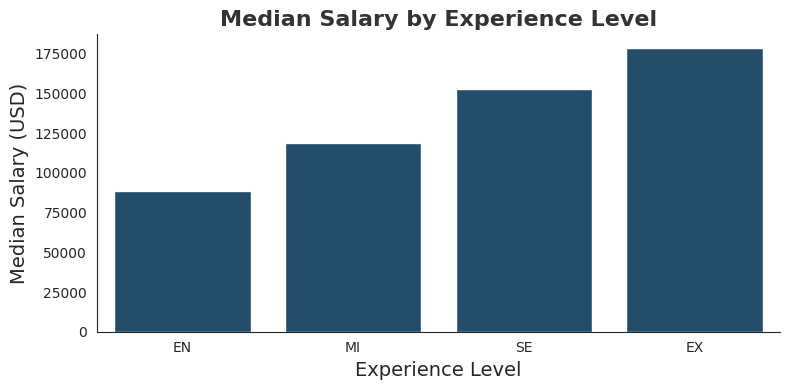

In [ ]:
exp_summary = (
    stable_groups.groupby('experience_level')['median']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .sort_values('median', ascending=False)
)
print(exp_summary)

# Plot
plt.figure(figsize=(8,4))

sns.set_style("white")

sns.barplot(
    data=exp_summary.reset_index(),
    x='experience_level', y='median',
    order=['EN', 'MI', 'SE', 'EX'],
    color='#184e77'
)

plt.title('Median Salary by Experience Level', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Median Salary (USD)', fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()

### Salary by Experience Level

Median salaries increase with seniority:

> **Executives (EX):** ≈ 178 K USD  
> **Senior (SE):** ≈ 153 K USD  
> **Mid-level (MI):** ≈ 119 K USD  
> **Entry-level (EN):** ≈ 89 K USD  

This confirms that executive roles command the highest pay, followed by senior, mid-level, and entry-level positions.

## Top Job Titles by Frequency (Stable Groups)

                     job_title  total_count  median_salary
115  Machine Learning Engineer         3821       166092.0
153          Software Engineer         4945       159500.0
83              Data Scientist         7077       140025.0
48               Data Engineer         5744       130000.0
40                Data Analyst         4224        88500.0


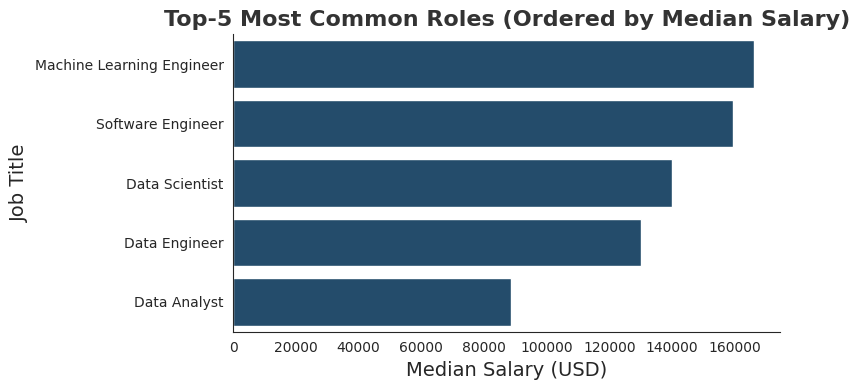

In [ ]:
# --- Top‑5 Most Common Roles (then ordered by Median Salary) ---

# Step 1: Aggregate total count & median salary
job_freq = (
    stable_groups.groupby('job_title')
    .agg(total_count=('count', 'sum'), median_salary=('median', 'median'))
    .reset_index()
)

# Step 2: Select top 5 by frequency
top_job_freq = job_freq.sort_values('total_count', ascending=False).head(5)

# Step 3: Sort this subset by median salary (for plotting)
top_job_freq = top_job_freq.sort_values('median_salary', ascending=False)

print(top_job_freq)

# Plot
plt.figure(figsize=(8,4))
sns.set_style("white")
sns.barplot(
    data=top_job_freq,
    y='job_title',
    x='median_salary',
    color='#184e77'
)

plt.title('Top‑5 Most Common Roles (Ordered by Median Salary)', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Median Salary (USD)', fontsize=14)
plt.ylabel('Job Title', fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

### Top Job Titles by Frequency

The most common in‑office roles in US, CA, and GB (2020–2024, stable groups):

> **1. Data Scientist** – 7,077 records  
> **2. Software Engineer** – 4,945 records  
> **3. Data Engineer** – 5,744 records  
> **4. Data Analyst** – 4,224 records  
> **5. Machine Learning Engineer** – 3,821 records  

This highlights how **Data Scientists, Software Engineers, and Data Engineers dominate the in‑office AI & Data workforce**.

## Top Job Titles by Median Salary (At Least 3 Stable Groups)

                                    job_title    median  group_count
106                              head of data  220000.0            3
5                          ai product manager  215300.0            3
54               data infrastructure engineer  189500.0            3
155                       solutions architect  188040.0            3
38                   computer vision engineer  185000.0            5
2                                ai developer  185000.0            3
149                 site reliability engineer  178844.0            3
16                          applied scientist  178000.0           13
114  machine learning infrastructure engineer  175800.0            3
140                   quantitative researcher  175000.0            3


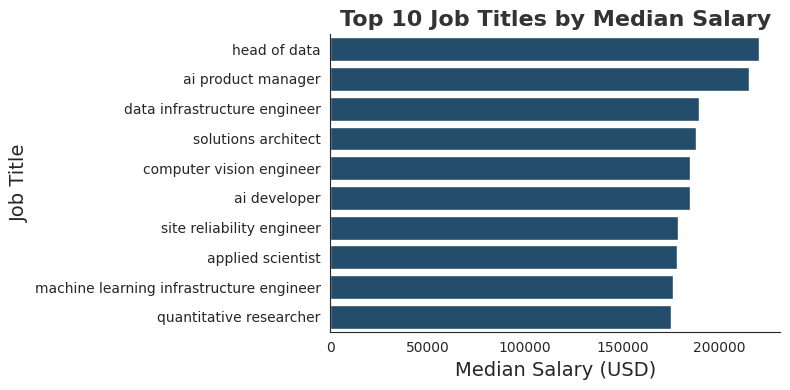

In [ ]:
# Ensure job titles are clean
stable_groups = stable_groups.copy()
stable_groups['job_title'] = stable_groups['job_title'].str.strip().str.lower()

# Compute median salary per job title (from stable groups)
job_title_salary = (
    stable_groups.groupby('job_title')['median']
    .median()
    .reset_index()
    .rename(columns={'median': 'median'})
)

# Count how many stable groups each job title has
counts = (
    stable_groups.groupby('job_title')
    .size()
    .reset_index(name='group_count')
)

# Merge and filter for job titles with >=3 stable groups
job_title_salary = job_title_salary.merge(counts, on='job_title')
job_title_salary = job_title_salary[job_title_salary['group_count'] >= 3]

# Sort and select Top 10
job_title_salary = job_title_salary.sort_values('median', ascending=False)
top10 = job_title_salary.head(10)
print(top10)

# Plot
plt.figure(figsize=(8,4))
sns.set_style("white")
sns.barplot(data=top10, y='job_title', x='median', color='#184e77')

plt.title('Top 10 Job Titles by Median Salary', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Median Salary (USD)', fontsize=14)
plt.ylabel('Job Title', fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()

### Top Job Titles by Median Salary

The highest‑paying in‑office roles (stable groups with ≥3 entries):

> **1. Head of Data** – ≈ 220 K USD  
> **2. AI Product Manager** – ≈ 215 K USD  
> **3. Data Infrastructure Engineer** – ≈ 190 K USD  
> **4. Solutions Architect** – ≈ 188 K USD  
> **5. Computer Vision Engineer** – ≈ 185 K USD  
> **6. AI Developer** – ≈ 185 K USD  
> **7. Site Reliability Engineer** – ≈ 179 K USD  
> **8. Applied Scientist** – ≈ 178 K USD  
> **9. Machine Learning Infrastructure Engineer** – ≈ 176 K USD  
> **10. Quantitative Researcher** – ≈ 175 K USD  

These insights are based solely on **stable market groups** (≥3 entries per segment) to ensure reliability.

## Salary by Company Size (Stable Groups Only)

              count           mean    median      min       max
company_size                                                   
L                48  156386.427083  161025.0  87150.0  214600.0
M               571  130493.150613  130000.0  36000.0  307710.0


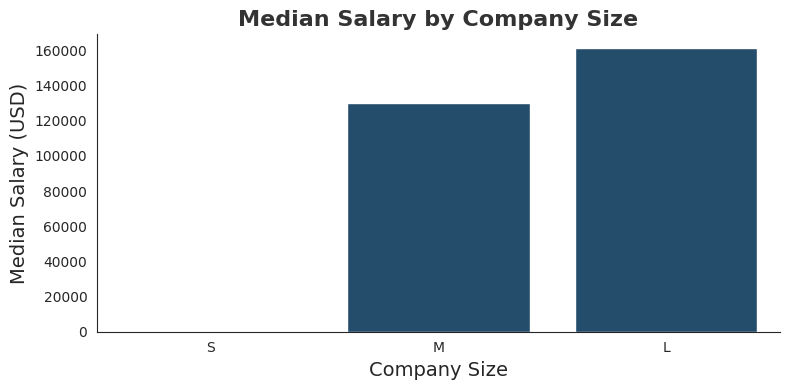

In [ ]:
company_size_summary = (
    stable_groups.groupby('company_size')['median']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .sort_values('median', ascending=False)
)
print(company_size_summary)

# Plot
plt.figure(figsize=(8,4))

sns.set_style("white")

sns.barplot(
    data=company_size_summary.reset_index(),
    x='company_size', y='median',
    order=['S', 'M', 'L'],
    color='#184e77'
)

plt.title('Median Salary by Company Size', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Company Size', fontsize=14)
plt.ylabel('Median Salary (USD)', fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()

### Salary by Company Size

Median salaries by company size:

> **Large (L):** ≈ 161 K USD  
> **Medium (M):** ≈ 130 K USD  

Medium‑sized companies dominate the dataset, but large companies offer a higher median salary.

## Salary by Country (Stable Groups Only)

                  count           mean     median      min       max
company_location                                                    
US                  462  143616.794372  140000.00  36000.0  307710.0
CA                   76  117146.500000  110555.75  60839.0  215300.0
GB                   81   83506.722222   73671.00  39612.5  287500.0


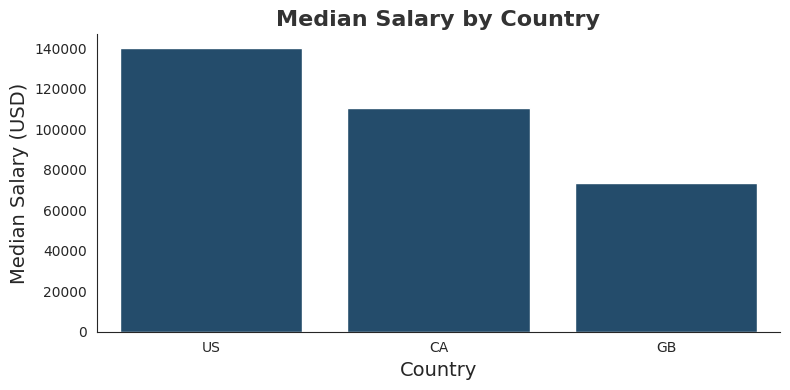

In [ ]:
country_summary = (
    stable_groups.groupby('company_location')['median']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .sort_values('median', ascending=False)
)
print(country_summary)

# Plot
plt.figure(figsize=(8,4))
sns.set_style("white")

sns.barplot(
    data=country_summary.reset_index(),
    x='company_location', y='median',
    color='#184e77'
)

plt.title('Median Salary by Country', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Median Salary (USD)', fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()

### Salary by Country

Median salaries by country:

> **United States (US):** ≈ 140 K USD  
> **Canada (CA):** ≈ 111 K USD  
> **Great Britain (GB):** ≈ 74 K USD  

US roles command the highest median salaries, followed by Canada and Great Britain.

## Key Strategic Insights
- **Seniority and specialization drive compensation:** Executive roles and niche technical positions (e.g., AI Product Manager, Head of Data) command the highest salaries.  
- **Data roles dominate the market:** Data Scientist, Software Engineer, and Data Engineer are the most common in‑office positions.  
- **Company size influences pay:** Large companies pay higher median salaries, but medium‑sized firms make up most of the market.  
- **US leads compensation:** US roles pay substantially more than Canada and Great Britain at median.  
- **Stable groups improve reliability:** Analyses are based on market segments with ≥3 responses to ensure trustworthy insights.

## Recommendations
- **For jobseekers:** Target executive and specialist roles for top compensation; use these benchmarks in negotiations.  
- **For employers:** Benchmark against US compensation for competitive global offers; focus on retention of senior and specialized talent.  
- **For analysts:** Use “stable group” medians for workforce planning and budgeting; avoid relying on single‑response outliers.

## Limitations & Further Work

- Data is filtered to in‑office, full‑time roles in **US, CA, GB** only.  
- Excludes remote and hybrid positions, which may pay differently.  
- Relies on self‑reported salary data, which may contain reporting bias.  
- Use of **stable groups (n ≥3)** improves reliability but excludes some niche or emerging roles — often those with very high reported salaries but insufficient data points for robust analysis.  
- Further analysis could include:
  - Year‑over‑year salary trends  
  - Comparison of remote vs. in‑office pay  
  - Industry‑specific breakdowns  
  - Expanded geographic coverage

## Export for Dashboard & Further Analysis

In [ ]:
stable_groups.to_csv('salary_groups.csv', index=False)
print("Exported 'salary_groups.csv' for dashboard use.")

Exported 'salary_groups.csv' for dashboard use.


## Appendix
- **Code & data fully reproducible**  
- **Data:**  
  - `salary_groups.csv` (stable, aggregated data for Tableau)  
  - Source: salaries.csv (AIJobs.net, 2020–2024)  
- **Tools:** Python (pandas, matplotlib, seaborn) & Tableau for dashboarding  
- **Environment:** All package versions exported to `requirements.txt` for reproducibility

## Environment Information & Reproducibility

To ensure reproducibility, the Python version and key packages used in this analysis are documented below.  
A full `requirements.txt` file is also generated so others can recreate the environment.

In [ ]:
import sys
print("Python version:", sys.version)
!pip freeze | grep -E "pandas|numpy|matplotlib|seaborn"

Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
geopandas==1.1.1
matplotlib==3.10.0
matplotlib-inline==0.1.7
matplotlib-venn==1.1.2
numpy==2.0.2
pandas==2.2.2
pandas-datareader==0.10.0
pandas-gbq==0.29.2
pandas-stubs==2.2.2.240909
seaborn==0.13.2
sklearn-pandas==2.2.0


In [ ]:
# Create a curated requirements.txt with only the libraries used
import pandas, numpy, matplotlib, seaborn
with open("requirements.txt", "w") as f:
    f.write(f"pandas=={pandas.__version__}\n")
    f.write(f"numpy=={numpy.__version__}\n")
    f.write(f"matplotlib=={matplotlib.__version__}\n")
    f.write(f"seaborn=={seaborn.__version__}\n")
print("Curated requirements.txt generated.")

Curated requirements.txt generated.


### Recreate This Environment

Run the following to install all required packages:

```bash
pip install -r requirements.txt


---

*Prepared for data-driven hiring, compensation benchmarking, and analytics leadership. Project by André Jardim, 2024.*